# AF5365 Assignment 2 (Due 11:59 pm, October 25, 2020)
## Please submit to https://docs.google.com/forms/d/e/1FAIpQLSdzmRicX-zgdRyLU36MuL5flmmRrKFBdOY3qZ9xSVdOEQKQYw/viewform?usp=sf_link

## Group Number:

## Names of your group members:

## Part 1. Grabbing a list of tickers of companies in the Dow Jones Industrial Average (50 %)



Using the concepts learned from our class. Download the HTML from the following site.

https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average

You can use the libraries discussed in our class and you are also free to explore others. 

1. requests - https://pypi.org/project/requests/
2. Beautiful Soup 4 - https://www.crummy.com/software/BeautifulSoup/bs4/doc/

Once the file is downloaded, you will need to extract the tickers from the table that is in the downloaded html file. 

Then you will need to store the data into a data structure of your choosing (i.e. list, dictionary.......)

Example: List of the Tickers

dji_tickers = ['MMM', 'AXP','AAPL','BA',...]

The final statements for Part 1 should be.

print(dji_tickers)
len(dji_tickers)

Part 1 Grading Rubric 

1. Using requests library to download the HTML  (30%)

2. Using Beautiful Soup 4 to traverse the HTML file and extract required data (40%)

3. Saving the data to the data structure and outputing the required final statements (20%)

4. Readability and structure of the Code (10%) (**Hint**: Be sure to leave notes so you can understand the flow of the code)

In [3]:
import requests
from bs4 import BeautifulSoup

In [4]:
#Send request
headers = {
    "User-Agent": "user-agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.90 Safari/537.36",
    "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3",   
}
url = 'https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average'
response = requests.get(url, headers = headers)

In [5]:
#Download HTML
filename = 'DJIA.html'
outputfile = open(filename, 'w',encoding="utf-8")
outputfile.write(response.text)
outputfile.close()

In [6]:
#Open the file
inputfile = open(filename,'r',encoding='utf-8')
soup = BeautifulSoup(inputfile)
inputfile.close()

#Extract the data to a list.
tables=soup.find_all("table")
DJIA_rows=tables[1].find_all('tr')
dji_tickers=[]
for i in range(1,31):
    symbols=DJIA_rows[i].find_all('td')[1].find_all('a')
    if len(symbols)==1:
        dji_tickers.append(symbols[0].text)
    else:
        dji_tickers.append(symbols[1].text)
print(dji_tickers)
len(dji_tickers)

['MMM', 'AXP', 'AMGN', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DOW', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK', 'MSFT', 'NKE', 'PG', 'CRM', 'TRV', 'UNH', 'VZ', 'V', 'WBA', 'WMT', 'DIS']


30

## Part 2. Analyzing the 3 Stocks and DJI (50%)

As an extension of what you learned from assignment 1, we will be applying the same methods, but with a slight twist. 

Instead of using yahoofinancials to received the data, we will be using the AlphaVantage API. (**Hint**: see Week 3's Jupyter file.)

Using Yahoofinancials for many securities will take an immensed amount of time to process. Therefore, an advantage of an API is its ease of use and speed. 

Sign up for a free account with AlphaVantage 

https://www.alphavantage.co

Then using AlphaVantage to download the data and do the following. 



**Grading Rubric**
1. Code works and properly outputs requirement (90\%)
    - Part a (30\%)
    - Part b (30\%)
    - Part c (30\%)
    
    
2. Readabliilty of Code (10\%) 


## Part 2a. Grabbing the Data 

Using the data structure of the list of stocks from above and also adding the index ticker (^DJI).

You will need to grab the price data for the 3 stocks you choose from Alpha Vantage and store them into a pandas dataframe. 

Please use daily price data for 5 years, 1 January 2014 - 31 December 2019.

Requirement: You must save the data you download into a CSV. 

alphavantage api wrapper :https://github.com/RomelTorres/alpha_vantage

In [7]:
#Use module timeseries
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import time
ts = TimeSeries(key='XX3ED8JVOHXUERYY', output_format='pandas',indexing_type='date')

In [8]:
tickers_data=[]
for i in range(3):
    stock_data=ts.get_daily_adjusted(dji_tickers[i],outputsize="full")[0]
    stock_data_5years=stock_data[(stock_data.index>'2014')&(stock_data.index<'2020')]
    tickers_data.append(stock_data_5years)
    filename=dji_tickers[i]+".csv"
    stock_data_5years.to_csv(filename)
    time.sleep(8)

## Part 2b. Calculations

Calculate the following from the data.

All calculation should be using adj close data

Print the following: 
- Log Returns from Price Data
- Average of Log Returns 
- Standard Deviation of Log Returns 
- Correlation Matrix of all 3 Securites （3 stocks)

In [9]:
#Get the dataframe of stocks' adjclose
import numpy as np
stocks_adjclose=pd.DataFrame()
for i in range(3):
    adjclose=tickers_data[i]['5. adjusted close']
    stocks_adjclose[dji_tickers[i]]=adjclose

In [10]:
#Log Returns from Price Data
stocks_log_ret=np.log(stocks_adjclose)-np.log(stocks_adjclose.shift(1))
stocks_log_ret

,MMM,AXP,AMGN
date,,,
2019-12-31,NaN,NaN,NaN
2019-12-30,-0.003350,-0.001528,-0.003324
2019-12-27,0.008100,0.007134,0.005230
2019-12-26,-0.003787,0.001756,0.001531
2019-12-24,0.000510,-0.005357,0.001776
...,...,...,...
2014-01-08,0.001318,0.005945,-0.025644
2014-01-07,0.007438,-0.003128,0.004735
2014-01-06,-0.000145,0.003798,-0.025664


In [11]:
#Average of Log Returns
stocks_log_ret.mean()

MMM    -0.000268
AXP    -0.000278
AMGN   -0.000586
dtype: float64

In [12]:
#Standard Deviation of Log Returns
stocks_log_ret.std()

MMM     0.011999
AXP     0.012736
AMGN    0.014816
dtype: float64

In [13]:
#Correlation Matrix of all 4 Securites
stocks_log_ret.corr()

,MMM,AXP,AMGN
MMM,1.000000,0.435763,0.396727
AXP,0.435763,1.000000,0.391084
AMGN,0.396727,0.391084,1.000000


## Part 2c. Visualization

Short exercise to visualize data using MatPlotLib

- Create and display a Histogram of the log returns for one of your stocks. 

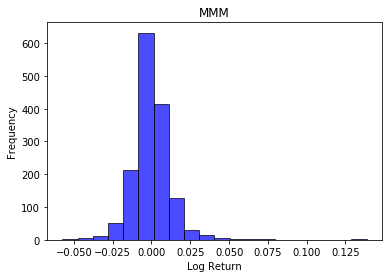

In [36]:
from matplotlib import pyplot as plt
plt.hist(stocks_log_ret['MMM'],bins=20,facecolor="blue",edgecolor="black", alpha=0.7)
plt.title('MMM')
plt.xlabel('Log Return')
plt.ylabel('Frequency')
plt.show()